# Installing **yfinance**

In [1]:
!pip install yfinance

# Importing the **libraries**

In [2]:
import pandas as pd
import yfinance as yf
import datetime

# I will first collect Google stock price data using the Yahoo Finance **API**

In [3]:
from datetime import date, timedelta
today = date.today()

In [4]:
d1 = today.strftime('%Y-%m-%d')
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime('%Y-%m-%d')
start_date = d2

data = yf.download('GOOG',
                   start = start_date,
                   end = end_date,
                   progress = False)
print(data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-08-24  134.727005  134.970001  130.300003  130.419998  130.271759   
2023-08-25  130.139999  131.399994  128.039993  130.690002  130.541458   
2023-08-28  132.080002  133.240005  130.850006  131.789993  131.640198   
2023-08-29  132.998001  137.294998  132.979996  135.490005  135.335999   
2023-08-30  135.570007  137.250000  135.020996  136.929993  136.774353   

              Volume  
Date                  
2023-08-24  18680400  
2023-08-25  20678100  
2023-08-28  16715500  
2023-08-29  30803300  
2023-08-30  21773400  


In [5]:
data['Date'] = data.index
data = data[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
data.reset_index(drop=True, inplace=True)
print(data.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2023-08-24  134.727005  134.970001  130.300003  130.419998  130.271759   
1 2023-08-25  130.139999  131.399994  128.039993  130.690002  130.541458   
2 2023-08-28  132.080002  133.240005  130.850006  131.789993  131.640198   
3 2023-08-29  132.998001  137.294998  132.979996  135.490005  135.335999   
4 2023-08-30  135.570007  137.250000  135.020996  136.929993  136.774353   

     Volume  
0  18680400  
1  20678100  
2  16715500  
3  30803300  
4  21773400  


In [6]:
data = data[['Date', 'Close']]
print(data.head())

        Date       Close
0 2023-08-24  130.419998
1 2023-08-25  130.690002
2 2023-08-28  131.789993
3 2023-08-29  135.490005
4 2023-08-30  136.929993


# Visulaizing the **data**

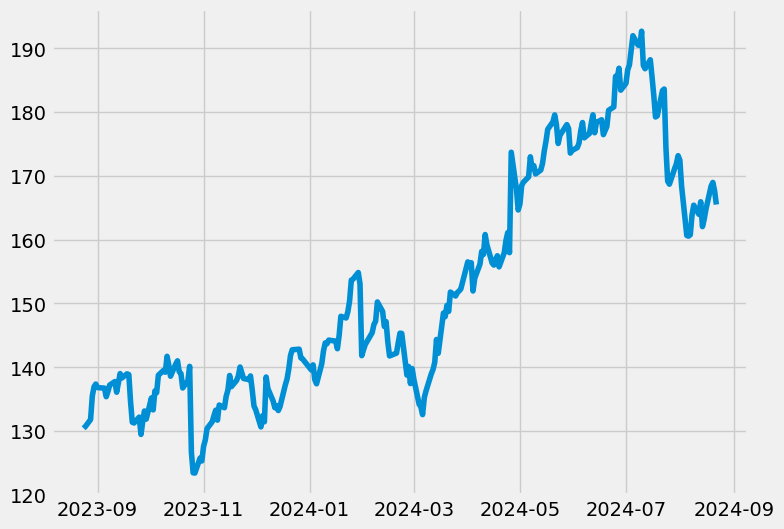

In [7]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 6))
plt.plot(data['Date'], data['Close'])

# Implementing seasonal **Decomposition**

<Figure size 640x480 with 0 Axes>

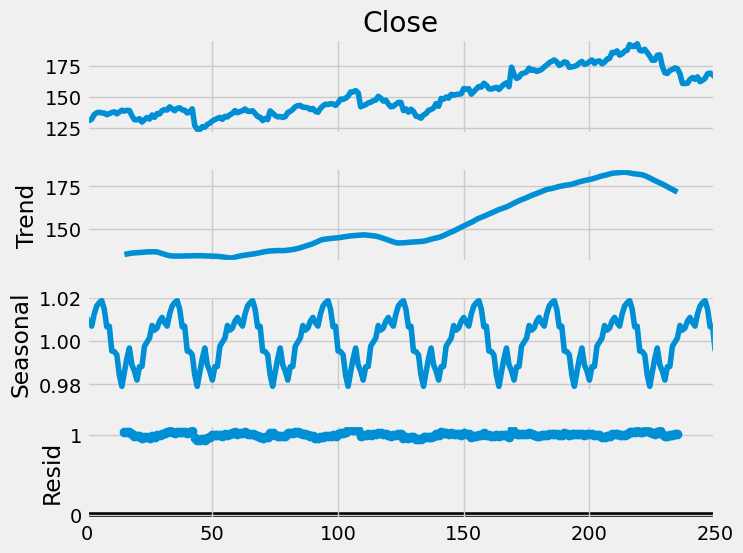

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"].dropna(),
                            model='multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(8, 6)

# Finding the values of p and **q**

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

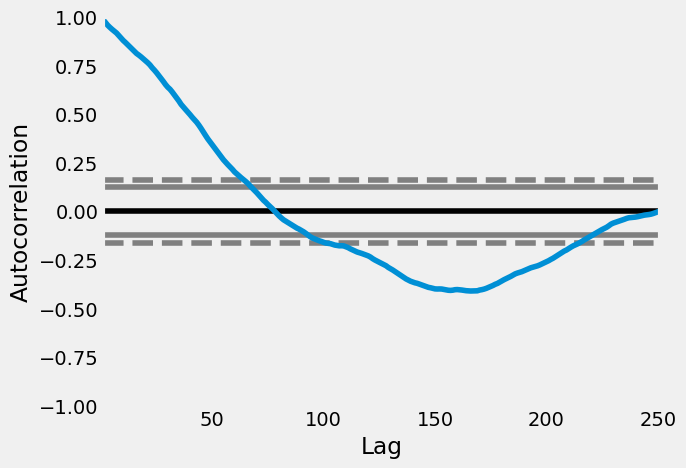

In [9]:
pd.plotting.autocorrelation_plot(data['Close'])

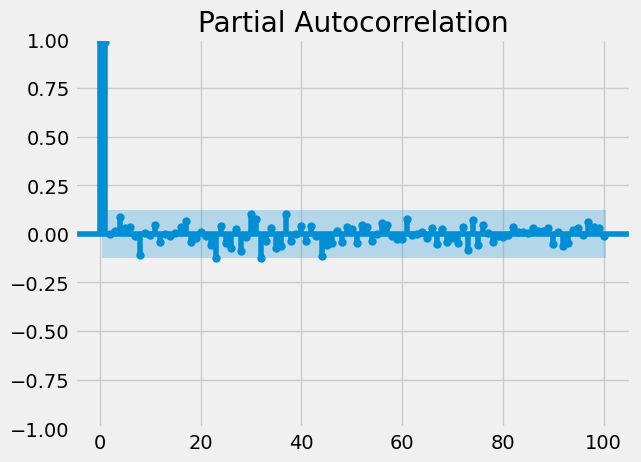

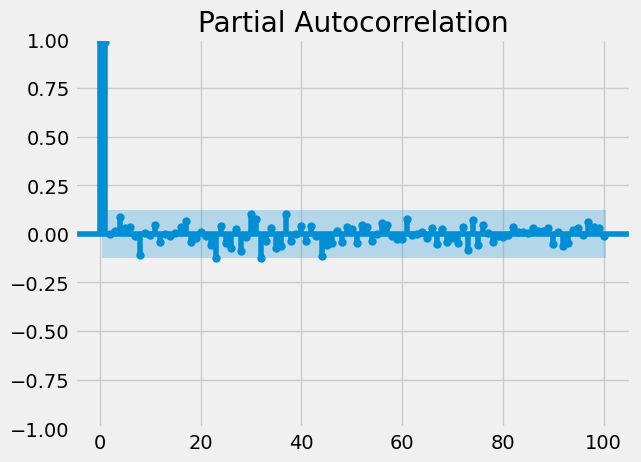

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

# Using ARIMA to predict the **result**

In [13]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['Close'], order=(p, d, q))
fitted = model.fit()
print(fitted.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -594.955
Date:                Fri, 23 Aug 2024   AIC                           1205.910
Time:                        13:01:28   BIC                           1234.081
Sample:                             0   HQIC                          1217.248
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5582      0.068     -8.218      0.000      -0.691      -0.425
ar.L2         -0.9819      0.096    -10.243      0.000      -1.170      -0.794
ar.L3         -0.1192      0.124     -0.960      0.3

In [14]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      130.419976
2      130.683391
3      131.756473
4      135.342215
          ...    
246    162.574423
247    165.026417
248    168.531646
249    168.649697
250    167.110210
Name: predicted_mean, Length: 251, dtype: float64


# Using SARIMA to predict **Result**

In [18]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -581.969
Date:                            Fri, 23 Aug 2024   AIC                           1193.938
Time:                                    13:20:10   BIC                           1246.022
Sample:                                         0   HQIC                          1214.929
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1115      1.257     -0.089      0.929      -2.576       2.353
ar.L2         -0.5576      1.334   

# Predicting future stocks using SARIMA model for 10 **days**

In [19]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

251    166.537077
252    166.268926
253    167.051424
254    166.430785
255    166.109590
256    166.921019
257    167.684267
258    168.521288
259    168.495544
260    167.564352
261    167.253131
Name: predicted_mean, dtype: float64


<Axes: >

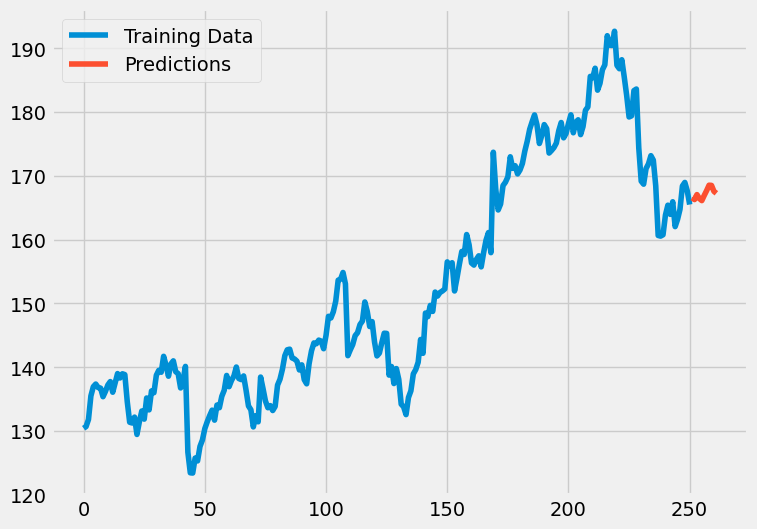

In [20]:
data['Close'].plot(legend=True, label='Training Data', figsize=(8, 6))
predictions.plot(legend=True, label='Predictions')